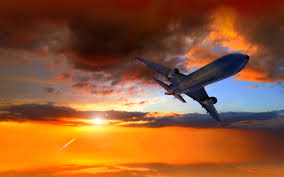

In [60]:
from IPython.display import Image, display
display(Image(filename="data/plane.jpeg", width= 700))

## Final Project Submission 
* Author: Valary Kones
* Student pace: full time hybrid
* Instructor name: Samuel Karu



---

## Project Overview

For this project I will use data about aviation accidents from 1962-2023 to generate insights for my client, a company that is trying to break into the aviation industry. I will use data cleaning, analysis and visualization to support my insights and generate 3 recommendations for this company. 

## Business Problem

My company is thinking of expanding into the aviation industry and is  interested in purchasing and operating airplanes for commercial and private enterprises. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.
To do this  I plan to answer the following data questions:
1. What is the distribution of accidents by aircraft type
2. What was the survival rate for each aircraft and which had the highest survival rate(less fatalities)
3. Which planes are sturdier, where aircraft damage wasn't total and complete

I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

---

## Data Understanding

The data provided is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

This data has 30 columns, showing the date,year, location, aircraft make, model and number of fatalities etc., of each accident during this time period. I will be interested in the information about the number of fatalities,and aircraft types as this will help me answer my data questions.
I will fill in any missing values i feel i need.


# Importing Necessary Libraries

In [61]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Loading the Data
I want to get a preliminary look at out data set.

In [62]:
df = pd.read_csv("./data/Aviation_Data.csv")

df.head()

c:\Users\valar\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [64]:
df.shape

(90348, 31)

In [65]:
df["Aircraft.Category"].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

As we can see, our data frame has 31 columns and 90,348 rows. That is alot of information. However we see that it also has some missing values in most of the columns. We are going to do some Data cleaning.

## Data Cleaning with Pandas.

First we are going to drop columns we don't need or those that have too many missing values to be worth it.Most of these columns are identifiers (accident number and event id) that we don't need. 

I am going to drop:
1. Schedule - because it has too many missing values
2. Far description - I dont think I will need this
3. Report Status
4. Air Carrier - too many missing values and it is not relevant to my analysis
5. Event.Id                
6. Investigation.Type      
7. Accident.Number
8. Publication date 
9. Airport name
10. Airport code  
11. Registration number 
12. Broad phase of flight      
          

In [66]:
df = df.drop(columns=["Event.Id", "Accident.Number", "Longitude", "Latitude",
                      "Airport.Name", "Airport.Code", "Registration.Number", "FAR.Description",
                      "Air.carrier", "Schedule","Publication.Date","Broad.phase.of.flight","Aircraft.Category",
                      "Amateur.Built", "Purpose.of.flight"])

In [67]:
# Now our data frame has 20 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Total.Uninjured         82977 non-null  float64
 14  Weather.Condition       84397 non-null

I am going to investigate the Report.Status and Investigation Type columns to see if i need them.

In [68]:
df["Report.Status"].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                     61754
Foreign                                                                                                                                                                                                                                                                                                                                                                                                                                             1999
<br /><br />                                                                                                          

This column seems to have "Probable Cause" as its mode.  I am going to drop this column because the Report status is ambiguous for most of the rows.

In [69]:
# looking at Investigation Type column

df["Investigation.Type"].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
18-11-2020        1
31-03-2021        1
05-08-2022        1
04-08-2021        1
11-12-2020        1
Name: Investigation.Type, Length: 71, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Total.Minor.Injuries    76956 non-null  float64
 13  Total.Uninjured         82977 non-null  float64
 14  Weather.Condition       84397 non-null

In [71]:
df = df.drop("Report.Status", axis=1)

Now let's look at Investigation Type, the values here are either Accidents, Incidents or some dates.
I am going to filter out the rows that aren't Accidents since we are only interested in the Accidents.
Incidents are mostly due to human error

In [72]:
df = df[df["Investigation.Type"] == "Accident"]

df["Investigation.Type"].value_counts()

Accident    85015
Name: Investigation.Type, dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85015 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      85015 non-null  object 
 1   Event.Date              85015 non-null  object 
 2   Location                84975 non-null  object 
 3   Country                 84809 non-null  object 
 4   Injury.Severity         84688 non-null  object 
 5   Aircraft.damage         83555 non-null  object 
 6   Make                    84979 non-null  object 
 7   Model                   84955 non-null  object 
 8   Number.of.Engines       80115 non-null  float64
 9   Engine.Type             79174 non-null  object 
 10  Total.Fatal.Injuries    74259 non-null  float64
 11  Total.Serious.Injuries  73152 non-null  float64
 12  Total.Minor.Injuries    73706 non-null  float64
 13  Total.Uninjured         79247 non-null  float64
 14  Weather.Condition       81882 non-null

In [74]:
df["Injury.Severity"].value_counts()

Non-Fatal     66380
Fatal(1)       6167
Fatal          5261
Fatal(2)       3711
Fatal(3)       1147
              ...  
Fatal(143)        1
Fatal(21)         1
Fatal(144)        1
Fatal(117)        1
Fatal(110)        1
Name: Injury.Severity, Length: 108, dtype: int64

It seems there are redundant values.  I will have this only have fatal and non-fatal .

In [75]:
df["Injury.Severity"] = df["Injury.Severity"].apply(lambda x: str(x).split("(")[0])

In [76]:
df["Injury.Severity"].value_counts()

Non-Fatal      66380
Fatal          17825
nan              327
Minor            215
Serious          172
Unavailable       96
Name: Injury.Severity, dtype: int64

In [77]:
df["Injury.Severity"] = df["Injury.Severity"].replace(to_replace= ["Minor", "Serious"],
                        value= "Non-Fatal")

In [78]:
df["Injury.Severity"].value_counts()

Non-Fatal      66767
Fatal          17825
nan              327
Unavailable       96
Name: Injury.Severity, dtype: int64

In [79]:
# Instead of guessing the nan and Unavailable values, we shall drop those rows.
df = df[(df["Injury.Severity"] == "Fatal") | (df["Injury.Severity"] == "Non-Fatal")]

In [80]:
df["Injury.Severity"].value_counts()

Non-Fatal    66767
Fatal        17825
Name: Injury.Severity, dtype: int64

Now let fill in some missing values.

In [81]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC
4,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,Cessna,501,NaN,NaN,1.0,2.0,NaN,0.0,VMC


In [82]:
# With location because we can't just guess some location, we will fill in null values
# with "Unknown"
df["Location"] = df["Location"].fillna("Unknown")

In [83]:
df["Location"].isna().sum()

0

In [84]:
df_sample = df[df["Country"].isna()].sample(5, random_state= 1)
df_sample

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
18922,Accident,1987-10-12,ST. THOMAS,NaN,Fatal,Substantial,Piper,PA-23-250,2.0,Reciprocating,1.0,1.0,4.0,0.0,VMC
23514,Accident,1989-07-16,LUQUILLO,NaN,Non-Fatal,Substantial,Piper,PA-32-300,1.0,Reciprocating,0.0,0.0,2.0,0.0,VMC
36575,Accident,1994-12-28,CHUUK ISLAND,NaN,Fatal,Destroyed,Mcdonnell Douglas,500,1.0,Turbo Shaft,2.0,0.0,0.0,0.0,VMC
10717,Accident,1985-01-18,LOIZA,NaN,Non-Fatal,Substantial,Bell,206L-1,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,VMC
9905,Accident,1984-09-26,WEST DELTA 105,NaN,Non-Fatal,Substantial,Bell,206L-1,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,VMC


In [85]:
df["Country"] = df["Country"].fillna("Unknown")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84592 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      84592 non-null  object 
 1   Event.Date              84592 non-null  object 
 2   Location                84592 non-null  object 
 3   Country                 84592 non-null  object 
 4   Injury.Severity         84592 non-null  object 
 5   Aircraft.damage         83196 non-null  object 
 6   Make                    84560 non-null  object 
 7   Model                   84535 non-null  object 
 8   Number.of.Engines       80016 non-null  float64
 9   Engine.Type             79081 non-null  object 
 10  Total.Fatal.Injuries    73921 non-null  float64
 11  Total.Serious.Injuries  72814 non-null  float64
 12  Total.Minor.Injuries    73368 non-null  float64
 13  Total.Uninjured         78908 non-null  float64
 14  Weather.Condition       81782 non-null

In [88]:
df_null["Injury.Severity"].value_counts()

Non-Fatal    10671
Name: Injury.Severity, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84592 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      84592 non-null  object 
 1   Event.Date              84592 non-null  object 
 2   Location                84592 non-null  object 
 3   Country                 84592 non-null  object 
 4   Injury.Severity         84592 non-null  object 
 5   Aircraft.damage         83196 non-null  object 
 6   Make                    84560 non-null  object 
 7   Model                   84535 non-null  object 
 8   Number.of.Engines       80016 non-null  float64
 9   Engine.Type             79081 non-null  object 
 10  Total.Fatal.Injuries    73921 non-null  float64
 11  Total.Serious.Injuries  72814 non-null  float64
 12  Total.Minor.Injuries    73368 non-null  float64
 13  Total.Uninjured         78908 non-null  float64
 14  Weather.Condition       81782 non-null

In [92]:
df["Aircraft.damage"].isna().sum()

1396

In [95]:
df = df.dropna(subset=["Aircraft.damage"])
df["Aircraft.damage"].isna().sum()

0

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83196 entries, 0 to 90345
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      83196 non-null  object 
 1   Event.Date              83196 non-null  object 
 2   Location                83196 non-null  object 
 3   Country                 83196 non-null  object 
 4   Injury.Severity         83196 non-null  object 
 5   Aircraft.damage         83196 non-null  object 
 6   Make                    83164 non-null  object 
 7   Model                   83139 non-null  object 
 8   Number.of.Engines       79035 non-null  float64
 9   Engine.Type             78105 non-null  object 
 10  Total.Fatal.Injuries    72738 non-null  float64
 11  Total.Serious.Injuries  71465 non-null  float64
 12  Total.Minor.Injuries    72163 non-null  float64
 13  Total.Uninjured         77535 non-null  float64
 14  Weather.Condition       80660 non-null

In [104]:
print(df["Make"].value_counts().to_string())

Cessna                            26572
Piper                             14567
Beech                              4154
Bell                               2055
Grumman                            1075
Mooney                             1070
BEECH                               982
Robinson                            938
Bellanca                            881
Hughes                              782
Boeing                              656
Schweizer                           621
Air Tractor                         591
BELL                                540
Aeronca                             481
Maule                               442
Champion                            425
Aero Commander                      351
Stinson                             345
De Havilland                        330
Rockwell                            325
Taylorcraft                         320
Luscombe                            318
Hiller                              309
North American                      299


In [107]:
df["Make"] = df["Make"].apply(lambda x: str(x).title())

In [108]:
print(df["Make"].value_counts().to_string())

Cessna                            26572
Piper                             14567
Beech                              5136
Bell                               2595
Mooney                             1303
Robinson                           1185
Grumman                            1152
Bellanca                           1037
Hughes                              912
Boeing                              901
Schweizer                           761
Air Tractor                         679
Aeronca                             630
Maule                               586
Champion                            515
Stinson                             436
Aero Commander                      419
Luscombe                            411
Taylorcraft                         381
North American                      375
De Havilland                        359
Rockwell                            347
Hiller                              346
Aerospatiale                        335
Mcdonnell Douglas                   291


In [109]:
df["Make"].isna().sum()

0

In [111]:
df["Model"].isna().sum()

57

In [117]:
df = df.dropna(subset=["Model"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83139 entries, 0 to 90345
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      83139 non-null  object 
 1   Event.Date              83139 non-null  object 
 2   Location                83139 non-null  object 
 3   Country                 83139 non-null  object 
 4   Injury.Severity         83139 non-null  object 
 5   Aircraft.damage         83139 non-null  object 
 6   Make                    83139 non-null  object 
 7   Model                   83139 non-null  object 
 8   Number.of.Engines       78999 non-null  float64
 9   Engine.Type             78077 non-null  object 
 10  Total.Fatal.Injuries    72688 non-null  float64
 11  Total.Serious.Injuries  71417 non-null  float64
 12  Total.Minor.Injuries    72114 non-null  float64
 13  Total.Uninjured         77484 non-null  float64
 14  Weather.Condition       80625 non-null

In [118]:
df["Number.of.Engines"].value_counts()

1.0    68742
2.0     8861
0.0     1056
4.0      183
3.0      154
8.0        2
6.0        1
Name: Number.of.Engines, dtype: int64

In [119]:
df["Number.of.Engines"].isna().sum()

4140

In [ ]:
df["Number.of.Engines"].agg(["mean","median","std"])


mean      1.109887
median    1.000000
std       0.379029
Name: Number.of.Engines, dtype: float64

In [124]:
# filling the missing value with the median value
median = df["Number.of.Engines"].median()
df["Number.of.Engines"] = df["Number.of.Engines"].fillna(median)

In [126]:
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                5062
Total.Fatal.Injuries      10451
Total.Serious.Injuries    11722
Total.Minor.Injuries      11025
Total.Uninjured            5655
Weather.Condition          2514
dtype: int64

In [127]:
df["Engine.Type"].value_counts()

Reciprocating    68642
Turbo Shaft       3436
Turbo Prop        2883
Unknown           1689
Turbo Fan         1004
Turbo Jet          395
None                16
Electric             7
NONE                 2
Hybrid Rocket        1
UNK                  1
LR                   1
Name: Engine.Type, dtype: int64

In [128]:
df = df.dropna(subset=["Engine.Type"])

In [130]:
df["Engine.Type"].value_counts()

Reciprocating    68642
Turbo Shaft       3436
Turbo Prop        2883
Unknown           1689
Turbo Fan         1004
Turbo Jet          395
None                16
Electric             7
NONE                 2
Hybrid Rocket        1
LR                   1
UNK                  1
Name: Engine.Type, dtype: int64

In [135]:
df = df[(df["Engine.Type"] != "NONE") & (df["Engine.Type"] != "None") &
        (df["Engine.Type"] != "Unknown") & (df["Engine.Type"] != "UNK")]

In [136]:
df["Engine.Type"].value_counts()

Reciprocating    68642
Turbo Shaft       3436
Turbo Prop        2883
Turbo Fan         1004
Turbo Jet          395
Electric             7
Hybrid Rocket        1
LR                   1
Name: Engine.Type, dtype: int64

Let's look at filling in Total fatal injuries. We shall assume that the null values in this column represent accidents that had no fatal injuries.

In [ ]:
# this is a dataframe of all the rows where total fatal injuries = NaN
df_null =df[df["Total.Fatal.Injuries"].isna()]
df_null["Injury.Severity"].value_counts()



Non-Fatal    9862
Name: Injury.Severity, dtype: int64

In [140]:
# we see that all these accidents were non-fatal so total.fatal.injuries  = 0
df["Total.Fatal.Injuries"] = df["Total.Fatal.Injuries"].fillna(0)

In [141]:
df.isna().sum()

Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Total.Fatal.Injuries          0
Total.Serious.Injuries    10808
Total.Minor.Injuries      10036
Total.Uninjured            4905
Weather.Condition           603
dtype: int64

In [142]:
df_null2 =df[df["Total.Serious.Injuries"].isna()]
df_null2["Injury.Severity"].value_counts()

Non-Fatal    8651
Fatal        2157
Name: Injury.Severity, dtype: int64

In [143]:
df_null2.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,0.0,NaN,1.0,44.0,VMC
89,Accident,1982-01-15,"BUTLER, PA",United States,Non-Fatal,Substantial,Cessna,310,2.0,Reciprocating,0.0,NaN,NaN,2.0,VMC
260,Accident,1982-02-07,"MARTHAS VINEYARD, MA",United States,Non-Fatal,Substantial,Bellanca,7KCAB,1.0,Reciprocating,0.0,NaN,NaN,2.0,VMC
293,Accident,1982-02-11,"BRENHAM, TX",United States,Fatal,Substantial,Piper,PA-60-602P,2.0,Reciprocating,1.0,NaN,NaN,NaN,VMC


In [144]:
df["Total.Serious.Injuries"] = df["Total.Serious.Injuries"].fillna(0.0)
df["Total.Minor.Injuries"] = df["Total.Minor.Injuries"].fillna(0.0)


In [145]:
df.isna().sum()

Investigation.Type           0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured           4905
Weather.Condition          603
dtype: int64

In [146]:
df_null3 =df[df["Total.Uninjured"].isna()]
df_null3["Injury.Severity"].value_counts()

Non-Fatal    2497
Fatal        2408
Name: Injury.Severity, dtype: int64

In [147]:
df_null3.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,0.0,NaN,IMC
293,Accident,1982-02-11,"BRENHAM, TX",United States,Fatal,Substantial,Piper,PA-60-602P,2.0,Reciprocating,1.0,0.0,0.0,NaN,VMC
593,Accident,1982-03-16,"MOBILE, AL",United States,Fatal,Substantial,Beech,C24R,1.0,Reciprocating,1.0,0.0,0.0,NaN,IMC
1970,Accident,1982-07-16,"WASHINGTON ISLAND, WI",United States,Non-Fatal,Destroyed,Cessna,172P,1.0,Reciprocating,0.0,1.0,3.0,NaN,VMC
2099,Accident,1982-07-25,"LOUISBURG, NC",United States,Fatal,Destroyed,Cessna,182A,1.0,Reciprocating,4.0,1.0,0.0,NaN,VMC


In [148]:
df["Total.Uninjured"] = df["Total.Uninjured"].fillna(0.0)

In [149]:
df.isna().sum()

Investigation.Type          0
Event.Date                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Make                        0
Model                       0
Number.of.Engines           0
Engine.Type                 0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition         603
dtype: int64

In [150]:
df["Weather.Condition"].value_counts()

VMC    69805
IMC     5300
UNK      553
Unk      108
Name: Weather.Condition, dtype: int64

In [151]:
df["Weather.Condition"].replace(to_replace= "Unk", value= "UNK", inplace= True)

In [152]:
df["Weather.Condition"] = df["Weather.Condition"].fillna("UNK")

In [153]:
df.isna().sum()

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64